In [2]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 모든 단어 사용

## 데이터 확인

### 데이터 로드

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
# 데이터 샘플 구성 확인
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


### 데이터 출력

In [4]:
# 첫 번째 훈련용 뉴스와 첫 번째 테스트용 뉴스 출력
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

- __num_words=None 적용시, 숫자 시퀀스에서 10,000 이상의 숫자 등장__

In [5]:
# 첫 번째 훈련용 뉴스와 테스트용 뉴스의 레이블 출력
print(y_train[0])
print(y_test[0])

3
3


In [6]:
# 클래스의 수 확인
# 레이블은 숫자 0부터 시작되므로, 모든 레이블 중 최댓값을 구하고 1을 더하여 현재 클래스의 개수 확인
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


### 데이터의 분포 확인

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


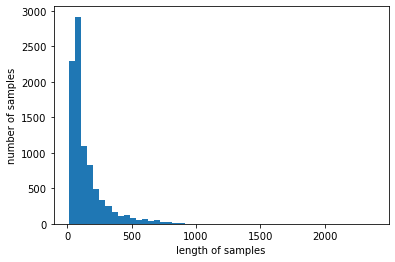

In [7]:
# 뉴스 데이터의 길이 분포 시각화
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

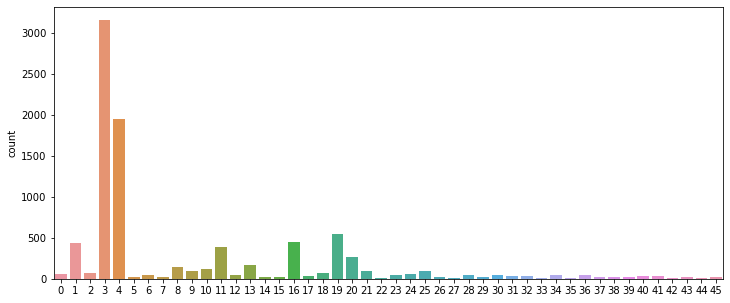

In [8]:
# 클래스 분포 시각화
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [9]:
# 클래스 분포 수치적 확인
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 데이터 복원

### 원본 뉴스 데이터로 복원

In [10]:
# 데이터의 단어장(Vocabulary) 생성
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [11]:
# 맵핑 확인
print(word_index['the'])
print(word_index['it'])

1
13


In [12]:
# reuters.get_word_index에는 실제 단어에 맵핑한 정수에 -3을 한 정수를 입력
# 따라서 word_index에서 index_word를 만들 때, 각 정수에 +3을 해준다.
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [13]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [14]:
# index_to_word에 0은 <pad>, 1은 <sos>, 2는 <unk>를 넣어줌
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [15]:
# index_to_word를 통해서 첫 번째 훈련용 뉴스 기사를 원래 텍스트로 복원
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


- __모든 단어를 사용(num_words=None)했기 때문에 \<unk>가 생성되지 않음__

In [16]:
# 전체 훈련용 뉴스 데이터를 텍스트 데이터로 변환
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [17]:
# 전체 훈련용 뉴스 데이터를 텍스트 데이터로 변환 후 확인
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [18]:
# 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [19]:
# 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환 후 확인
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

## 벡터화

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### DTM 생성

In [21]:
# 사이킷런의 CountVectorizer()를 통한 DTM(Document Term Matrix) 생성 및 크기 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm = dtmvector.transform(x_test)

print(x_train_dtm.shape)
print(x_test_dtm.shape)

(8982, 26506)
(2246, 26506)


- __훈련용 뉴스의 개수(DTM의 행의 개수) : 8,982__
- __테스트용 뉴스의 개수(DTM의 행의 개수) : 2,246__
- __단어의 개수(DTM의 열의 개수) : 26,506__

### TF-IDF Matrix 생성

In [22]:
# 사이킷런의 TfidfTransformer()를 통한 TF-IDF Matrix 생성 및 크기 확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)    # DTM을 TF-IDF 행렬로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

print(tfidfv.shape)
print(tfidfv_test.shape)

(8982, 26506)
(2246, 26506)


## 나이브 베이즈 분류기

In [23]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import classification_report # 
from sklearn.metrics import confusion_matrix

In [24]:
# 사이킷런의 MultinomialNB()를 사용해 학습
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [25]:
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.5997328584149599


In [26]:
print(classification_report(y_test, mod.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## CNB (Complement Naive Bayes Classifier,  컴플리먼트 나이브 베이즈 분류기)

In [27]:
# 사이킷런의 ComplementNB()를 사용해 학습
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [28]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


In [29]:
print(classification_report(y_test, cb.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.63      0.88      0.73       105
           2       0.91      0.50      0.65        20
           3       0.87      0.91      0.89       813
           4       0.75      0.93      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.43      0.08      0.13        38
           9       0.81      0.88      0.85        25
          10       0.96      0.73      0.83        30
          11       0.55      0.67      0.61        83
          12       0.00      0.00      0.00        13
          13       0.62      0.54      0.58        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.77      0.71        99
          17       0.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 로지스틱 회귀(Logistic Regression) = 소프트맥스 회귀(Softmax Regression)

In [30]:
# 사이킷런의 LogisticRegression()를 사용해 학습
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [31]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.813446126447017


In [32]:
print(classification_report(y_test, lr.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.80      0.77       105
           2       0.70      0.70      0.70        20
           3       0.93      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      1.00      0.97        14
           7       1.00      0.67      0.80         3
           8       0.68      0.71      0.69        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.66      0.73      0.70        83
          12       0.57      0.31      0.40        13
          13       0.61      0.62      0.61        37
          14       0.67      1.00      0.80         2
          15       0.71      0.56      0.63         9
          16       0.71      0.77      0.74        99
          17       0.67    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 선형 서포트 벡터 머신

In [33]:
# 사이킷런의 LinearSVC()를 사용해 학습
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [34]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.786286731967943


In [35]:
print(classification_report(y_test, lsvc.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.77      0.76       105
           2       0.65      0.75      0.70        20
           3       0.91      0.91      0.91       813
           4       0.81      0.85      0.83       474
           5       0.50      0.20      0.29         5
           6       0.81      0.93      0.87        14
           7       1.00      0.33      0.50         3
           8       0.55      0.61      0.57        38
           9       0.79      0.92      0.85        25
          10       0.80      0.80      0.80        30
          11       0.62      0.73      0.67        83
          12       0.31      0.31      0.31        13
          13       0.62      0.62      0.62        37
          14       1.00      0.50      0.67         2
          15       0.57      0.44      0.50         9
          16       0.69      0.73      0.71        99
          17       1.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 결정 트리(Decision Tree)

In [36]:
# 사이킷런의 DecisionTreeClassifier()를 사용해 학습
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [37]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6211041852181657


In [38]:
print(classification_report(y_test, tree.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.69      0.43      0.53       105
           2       0.75      0.45      0.56        20
           3       0.94      0.85      0.89       813
           4       0.40      0.89      0.55       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.16      0.28        25
          10       0.89      0.80      0.84        30
          11       0.58      0.60      0.59        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.61      0.83      0.70        99
          17       0.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 랜덤 포레스트(Random Forest)

In [39]:
# 사이킷런의 RandomForestClassifier()를 사용해 학습
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [40]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6544968833481746


In [41]:
print(classification_report(y_test, forest.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.25      0.58      0.35        12
           1       0.35      0.60      0.44       105
           2       0.32      0.40      0.36        20
           3       0.82      0.89      0.85       813
           4       0.62      0.84      0.71       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.51      0.47      0.49        38
           9       1.00      0.28      0.44        25
          10       0.46      0.20      0.28        30
          11       0.56      0.64      0.60        83
          12       0.40      0.15      0.22        13
          13       0.33      0.16      0.22        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.46      0.52        99
          17       0.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [42]:
# 사이킷런의 GradientBoostingClassifier()를 사용해 학습
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [43]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7702582368655387


In [44]:
print(classification_report(y_test, grbt.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.81      0.71      0.76       105
           2       0.58      0.70      0.64        20
           3       0.87      0.91      0.89       813
           4       0.78      0.86      0.82       474
           5       1.00      0.20      0.33         5
           6       0.77      0.71      0.74        14
           7       1.00      0.33      0.50         3
           8       0.60      0.63      0.62        38
           9       0.91      0.80      0.85        25
          10       0.79      0.77      0.78        30
          11       0.61      0.65      0.63        83
          12       0.50      0.46      0.48        13
          13       0.48      0.32      0.39        37
          14       0.00      0.00      0.00         2
          15       0.25      0.11      0.15         9
          16       0.72      0.71      0.71        99
          17       0.83    

##  보팅(Voting)

In [45]:
# 로지스틱 회귀, CNB, 그래디언트 부스팅 트리 세 가지를 사용하여 소프트 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
         ('cb', ComplementNB()),
         ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [46]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8187889581478184


In [47]:
print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.80      0.77      0.79       105
           2       0.67      0.80      0.73        20
           3       0.93      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.67      0.71      0.69        83
          12       0.60      0.46      0.52        13
          13       0.69      0.65      0.67        37
          14       0.29      1.00      0.44         2
          15       0.40      0.22      0.29         9
          16       0.73      0.76      0.74        99
          17       0.75    

## 정리

##### 모든 단어 사용시 모델별 accuracy / f1-score
>- 나이브 베이즈 : 0.60 / 0.50
>- CNB : 0.76 / 0.73
>- 로지스틱 회귀 : 0.81 / 0.81
>- 서포트 벡터 머신 : 0.79 / 0.78
>- 결정 트리 : 0.62 / 0.58
>- 랜덤 포레스트 : 0.65 / 0.62
>- 그래디언트 부스팅 트리 : 0.77 / 0.76
>- 보팅 : 0.82 / 0.81
- __accuracy는 보팅이 82%로 가장 높고, 나이브베이즈가 60%로 가장 낮았으며,  
f1-score는 보팅이 81%로 가장 높고, 나이브베이즈가 60%로 가장 낮았다.__

---

# 빈도수 상위 5,000개의 단어만 사용

## 데이터 로드

In [48]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


- __위에서 모든 단어 사용시 데이터를 확인해 보았으므로 데이터 확인 과정 생략__

## 데이터 복원

### 원본 데이터 복원

In [49]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [50]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [51]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [52]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [53]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [54]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

## 벡터화

### DTM 생성

In [55]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm = dtmvector.transform(x_test)

print(x_train_dtm.shape)
print(x_test_dtm.shape)

(8982, 4867)
(2246, 4867)


###  TF-IDF Matrix 생성

In [56]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

print(tfidfv.shape)
print(tfidfv_test.shape)

(8982, 4867)
(2246, 4867)


## 나이브 베이즈 분류기

In [57]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [58]:
predicted = mod.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.6731967943009796


In [59]:
print(classification_report(y_test, mod.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## CNB (Complement Naive Bayes Classifier, 컴플리먼트 나이브 베이즈 분류기)

In [60]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [61]:
predicted = cb.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.7707034728406055


In [62]:
print(classification_report(y_test, cb.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.63      0.86      0.73       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.74      0.92      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.57      0.21      0.31        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.76      0.63        83
          12       0.00      0.00      0.00        13
          13       0.69      0.59      0.64        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.67      0.79      0.72        99
          17       0.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 로지스틱 회귀(Logistic Regression) = 소프트맥스 회귀(Softmax Regression)

In [63]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [64]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8058771148708815


In [65]:
print(classification_report(y_test, lr.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.80      0.79       105
           2       0.74      0.85      0.79        20
           3       0.91      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.64      0.74      0.68        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.50      0.50      0.50         2
          15       0.83      0.56      0.67         9
          16       0.67      0.73      0.70        99
          17       0.82    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 선형 서포트 벡터 머신

In [66]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [67]:
predicted = lsvc.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.7666963490650045


In [68]:
print(classification_report(y_test, lsvc.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.63      0.70      0.67       105
           2       0.78      0.70      0.74        20
           3       0.90      0.90      0.90       813
           4       0.79      0.84      0.82       474
           5       0.20      0.20      0.20         5
           6       0.81      0.93      0.87        14
           7       1.00      0.33      0.50         3
           8       0.54      0.68      0.60        38
           9       0.78      0.84      0.81        25
          10       0.89      0.83      0.86        30
          11       0.63      0.72      0.67        83
          12       0.43      0.23      0.30        13
          13       0.54      0.59      0.56        37
          14       0.33      0.50      0.40         2
          15       0.75      0.33      0.46         9
          16       0.66      0.68      0.67        99
          17       0.80    

## 결정 트리(Decision Tree)

In [69]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [70]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6179875333926982


In [71]:
print(classification_report(y_test, tree.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.40      0.52       105
           2       0.60      0.45      0.51        20
           3       0.94      0.84      0.89       813
           4       0.39      0.91      0.55       474
           5       0.00      0.00      0.00         5
           6       1.00      0.57      0.73        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.87      0.87      0.87        30
          11       0.62      0.48      0.54        83
          12       0.17      0.08      0.11        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.82      0.69        99
          17       0.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 랜덤 포레스트(Random Forest)

In [72]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [73]:
predicted = forest.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.701246660730187


In [74]:
print(classification_report(y_test, forest.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.28      0.42      0.33        12
           1       0.42      0.78      0.55       105
           2       0.44      0.35      0.39        20
           3       0.84      0.90      0.87       813
           4       0.68      0.84      0.75       474
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       1.00      0.33      0.50         3
           8       0.59      0.53      0.56        38
           9       0.71      0.40      0.51        25
          10       0.89      0.53      0.67        30
          11       0.57      0.69      0.62        83
          12       0.33      0.15      0.21        13
          13       0.46      0.32      0.38        37
          14       0.00      0.00      0.00         2
          15       1.00      0.11      0.20         9
          16       0.70      0.67      0.68        99
          17       0.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [75]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [76]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.767586821015138


In [77]:
print(classification_report(y_test, grbt.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.80      0.68      0.73       105
           2       0.70      0.70      0.70        20
           3       0.90      0.90      0.90       813
           4       0.76      0.83      0.79       474
           5       0.14      0.20      0.17         5
           6       0.93      0.93      0.93        14
           7       0.50      0.33      0.40         3
           8       0.64      0.66      0.65        38
           9       0.91      0.84      0.87        25
          10       0.87      0.87      0.87        30
          11       0.62      0.66      0.64        83
          12       0.46      0.46      0.46        13
          13       0.55      0.43      0.48        37
          14       0.08      0.50      0.14         2
          15       0.33      0.22      0.27         9
          16       0.72      0.77      0.75        99
          17       0.33    

## 보팅(Voting)

In [78]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
         ('cb', ComplementNB()),
         ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [79]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8161175422974176


In [80]:
print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.77      0.79       105
           2       0.71      0.85      0.77        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.33      0.20      0.25         5
           6       0.93      0.93      0.93        14
           7       0.67      0.67      0.67         3
           8       0.72      0.68      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.67      0.70      0.68        83
          12       0.60      0.46      0.52        13
          13       0.68      0.62      0.65        37
          14       0.12      0.50      0.20         2
          15       0.67      0.44      0.53         9
          16       0.74      0.74      0.74        99
          17       0.57    

## 정리

##### 빈도수 상위  5,000 단어 사용시 accuracy / f1-score

>- 나이브 베이즈 : 0.67 / 0.60
>- CNB : 0.77 / 0.75
>- 로지스틱 회귀 : 0.81 / 0.80
>- 서포트 벡터 머신 : 0.77 / 0.76
>- 결정 트리 : 0.62 / 0.57
>- 랜덤 포레스트 : 0.70 / 0.68
>- 그래디언트 부스팅 트리 : 0.77 / 0.77
>- 보팅 : 0.82 / 0.81

- __accuracy는 보팅이 82%로 가장 높고, 결정트리가 62%로 가장 낮았으며,  
f1-score는 보팅이 81%로 가장 높고, 결정트리가 57%로 가장 낮았다.__

---

# 직접 단어 갯수를 설정해서 사용 : 빈도수 상위 1,000개 단어만 사용

- __모든 단어를 사용했을 때와 빈도수 상위 5,000 단어를 사용했을 때 그 차이를 보이지 않으므로, 단어수를 더 줄여서 비교__
- __빈도수 상위 1,000개 단어만 사용__

## 데이터 로드

In [81]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


- __위에서 모든 단어 사용시 데이터를 확인해 보았으므로 데이터 확인 과정 생략__

## 데이터 복원

### 원본 데이터 복원

In [82]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [83]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [84]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [85]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> <unk> revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash <unk> per share this year should be 2 50 to three dlrs reuter 3


In [86]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [87]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

## 벡터화

### DTM 생성

In [88]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm = dtmvector.transform(x_test)

print(x_train_dtm.shape)
print(x_test_dtm.shape)

(8982, 969)
(2246, 969)


###  TF-IDF Matrix 생성

In [89]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

print(tfidfv.shape)
print(tfidfv_test.shape)

(8982, 969)
(2246, 969)


## 나이브 베이즈 분류기

In [90]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [91]:
predicted = mod.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.6856634016028496


In [92]:
print(classification_report(y_test, mod.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.46      0.76      0.58       105
           2       0.00      0.00      0.00        20
           3       0.92      0.86      0.89       813
           4       0.60      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.78      0.37      0.50        38
           9       0.91      0.40      0.56        25
          10       1.00      0.20      0.33        30
          11       0.44      0.81      0.57        83
          12       0.00      0.00      0.00        13
          13       1.00      0.11      0.20        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.53      0.70      0.60        99
          17       0.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## CNB (Complement Naive Bayes Classifier, 컴플리먼트 나이브 베이즈 분류기)

In [93]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [94]:
predicted = cb.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.7346393588601959


In [95]:
print(classification_report(y_test, cb.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.53      0.78      0.63       105
           2       0.00      0.00      0.00        20
           3       0.93      0.88      0.90       813
           4       0.69      0.93      0.79       474
           5       0.00      0.00      0.00         5
           6       0.82      0.64      0.72        14
           7       1.00      0.33      0.50         3
           8       0.69      0.24      0.35        38
           9       0.83      0.96      0.89        25
          10       0.88      0.73      0.80        30
          11       0.50      0.78      0.61        83
          12       0.00      0.00      0.00        13
          13       0.64      0.38      0.47        37
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         9
          16       0.60      0.75      0.67        99
          17       0.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 로지스틱 회귀(Logistic Regression) = 소프트맥스 회귀(Softmax Regression)

In [96]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [97]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.780053428317008


In [98]:
print(classification_report(y_test, lr.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.74      0.75      0.75       105
           2       0.65      0.65      0.65        20
           3       0.90      0.93      0.91       813
           4       0.80      0.85      0.82       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.60      0.68      0.64        38
           9       0.80      0.80      0.80        25
          10       0.86      0.80      0.83        30
          11       0.64      0.69      0.66        83
          12       0.86      0.46      0.60        13
          13       0.50      0.62      0.55        37
          14       0.20      0.50      0.29         2
          15       0.80      0.44      0.57         9
          16       0.65      0.72      0.68        99
          17       0.64    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 선형 서포트 벡터 머신

In [99]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [100]:
predicted = lsvc.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.7221727515583259


In [101]:
print(classification_report(y_test, lsvc.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.67      0.70      0.69       105
           2       0.48      0.50      0.49        20
           3       0.90      0.91      0.90       813
           4       0.74      0.79      0.77       474
           5       0.00      0.00      0.00         5
           6       0.72      0.93      0.81        14
           7       1.00      0.33      0.50         3
           8       0.56      0.58      0.57        38
           9       0.85      0.68      0.76        25
          10       0.72      0.70      0.71        30
          11       0.59      0.61      0.60        83
          12       0.56      0.38      0.45        13
          13       0.41      0.54      0.47        37
          14       1.00      0.50      0.67         2
          15       0.33      0.22      0.27         9
          16       0.65      0.61      0.63        99
          17       0.67    

## 결정 트리(Decision Tree)

In [102]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [103]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6179875333926982


In [104]:
print(classification_report(y_test, tree.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.73      0.42      0.53       105
           2       0.67      0.30      0.41        20
           3       0.58      0.90      0.70       813
           4       0.69      0.81      0.75       474
           5       0.00      0.00      0.00         5
           6       1.00      0.64      0.78        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.93      0.87      0.90        30
          11       0.57      0.59      0.58        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.57      0.76      0.65        99
          17       0.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 랜덤 포레스트(Random Forest)

In [105]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [106]:
predicted = forest.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.707479964381122


In [107]:
print(classification_report(y_test, forest.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.35      0.58      0.44        12
           1       0.47      0.79      0.59       105
           2       0.27      0.20      0.23        20
           3       0.85      0.91      0.88       813
           4       0.69      0.86      0.76       474
           5       0.00      0.00      0.00         5
           6       0.73      0.57      0.64        14
           7       0.20      0.33      0.25         3
           8       0.46      0.50      0.48        38
           9       0.82      0.72      0.77        25
          10       0.73      0.53      0.62        30
          11       0.62      0.63      0.62        83
          12       0.40      0.15      0.22        13
          13       0.48      0.35      0.41        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.61      0.55      0.57        99
          17       1.00    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [108]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [109]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7457702582368655


In [110]:
print(classification_report(y_test, grbt.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.75      0.66      0.70       105
           2       0.73      0.55      0.63        20
           3       0.89      0.91      0.90       813
           4       0.73      0.85      0.78       474
           5       0.20      0.20      0.20         5
           6       0.93      0.93      0.93        14
           7       0.25      0.33      0.29         3
           8       0.51      0.58      0.54        38
           9       0.79      0.76      0.78        25
          10       0.87      0.87      0.87        30
          11       0.65      0.67      0.66        83
          12       0.36      0.38      0.37        13
          13       0.51      0.51      0.51        37
          14       0.17      0.50      0.25         2
          15       0.40      0.22      0.29         9
          16       0.65      0.72      0.68        99
          17       0.50    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 보팅(Voting)

In [111]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
         ('cb', ComplementNB()),
         ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [112]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7845057880676759


In [113]:
print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.77      0.76      0.77       105
           2       0.76      0.65      0.70        20
           3       0.91      0.94      0.93       813
           4       0.78      0.86      0.82       474
           5       0.33      0.20      0.25         5
           6       0.93      1.00      0.97        14
           7       0.33      0.33      0.33         3
           8       0.62      0.63      0.62        38
           9       0.80      0.80      0.80        25
          10       0.86      0.83      0.85        30
          11       0.63      0.66      0.65        83
          12       0.43      0.46      0.44        13
          13       0.55      0.59      0.57        37
          14       0.20      0.50      0.29         2
          15       0.50      0.33      0.40         9
          16       0.69      0.74      0.71        99
          17       0.64    

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## 정리

##### 빈도수 상위  1,000 단어 사용시 accuracy / f1-score

>- 나이브 베이즈 : 0.69 / 0.64
>- CNB : 0.73 / 0.70
>- 로지스틱 회귀 : 0.78 / 0.77
>- 서포트 벡터 머신 : 0.72 / 0.72
>- 결정 트리 : 0.62 / 0.55
>- 랜덤 포레스트 : 0.71 / 0.68
>- 그래디언트 부스팅 트리 : 0.75 / 0.74
>- 보팅 : 0.78 / 0.78

- __accuracy는 보팅이 82%로 가장 높고, 결정트리가 62%로 가장 낮았으며,  
f1-score는 보팅이 81%로 가장 높고, 결정트리가 57%로 가장 낮았다.__

---

# 정리 모음

##### Vocabulary Size 따른 머신 러닝 모델별 accuracy / f1-score

- __머신 러닝 모델별 accuracy__(모든 단어 / 5,000개 / 1,000개)
    - 나이브 베이즈 :          0.60 / 0.67 / __0.69__
    - CNB :                 0.76 / __0.77__ / 0.73
    - 로지스틱 회귀 :          __0.81__ / 0.81 / 0.78
    - 서포트 벡터 머신 :        __0.79__ / 0.77 / 0.72
    - 결정 트리 :             __0.62__ / 0.62 / 0.62
    - 랜덤 포레스트 :          0.65 / __0.70__ / 0.71
    - 그래디언트 부스팅 트리 :   __0.77__ / 0.77 / 0.75
    - 보팅 :                 __0.82__ / 0.82 / 0.78


- __머신 러닝 모델별 f1-score__(모든 단어 / 5,000개 / 1,000개)
    - 나이브 베이즈 :          0.60 / 0.50 / __0.64__
    - CNB :                 __0.75__ / 0.73 / 0.70
    - 로지스틱 회귀 :          0.80 / __0.81__ / 0.77
    - 서포트 벡터 머신 :        0.76 / __0.78__ / 0.72
    - 결정 트리 :             0.57 / __0.58__ / 0.55
    - 랜덤 포레스트 :          __0.68__ / 0.62 / __0.68__
    - 그래디언트 부스팅 트리 :   __0.77__ / 0.76 / 0.74
    - 보팅 :                 __0.81__ / __0.81__ / 0.78

>- __accuracy는 모든 단어를 사용했을 때 머신 러닝 모델들이 대체적으로 높을 결과가 도출됐다.__
>- __f1-score는 모든 단어를 사용했을 때 CNB, 랜덤포레스트, 그래디언부스팅트리, 보팅이 높른 결과가 도출됐고, 빈도수 상위 5,000단어를 사용했을 때 로지스틱회귀, 서프트벡터머신, 결정트리, 보팅이 높은 결과가 도출됐다.__
>- __보팅이 대체적으로 성능이 좋았지만 그래디언트부스팅트리와 함께 학습에 소요되는 시간이 매우 길었다.__
>- __로지스틱회귀의 경우 시간 소모가 적고, 성능 또한 보팅과 크게 차이나지 않았다.__

---

# 딥러닝 모델과 비교해 보기

위 과정을 통해 나온 최적의 모델과 단어 수 조건에서, 본인이 선택한 다른 모델을 적용한 결과와 비교해 봅시다. 감정분석 등에 사용했던 RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택해서 오늘 사용했던 데이터셋을 학습해 보고 나오는 결과를 비교해 봅시다. 단, 공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.

## 데이터 로드

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [49]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel-dj24/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## 데이터 확인

훈련용 뉴스의 최대 길이: 2376
훈련용 뉴스의 평균 길이: 145.5398574927633


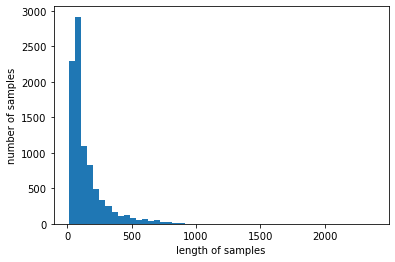

In [50]:
print("훈련용 뉴스의 최대 길이: {}".format(max(len(l) for l in x_train)))
print("훈련용 뉴스의 평균 길이: {}".format(sum(map(len, x_train))/len(x_train)))
      
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

테스트용 뉴스의 최대 길이: 1032
테스트용 뉴스의 평균 길이: 147.66117542297417


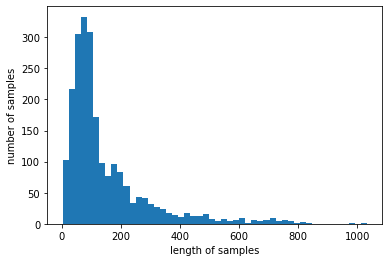

In [51]:
print("테스트용 뉴스의 최대 길이: {}".format(max(len(l) for l in x_test)))
print("테스트용 뉴스의 평균 길이: {}".format(sum(map(len, x_test))/len(x_test)))
      
plt.hist([len(s) for s in x_test], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

- __훈련용과 테스트용 데이터릐 길이가 다르므로 동일하게 처리__

## 데이터 처리

In [53]:
# padding
maxlen = 100
x_train = keras.preprocessing.sequence.pad_sequences(x_train, 
                                                     padding='pre', 
                                                     maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, 
                                                    padding='pre', 
                                                    maxlen=maxlen)

In [56]:
print(x_train[10])
print(x_test[10])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    1
  245  273  207  156   53   74  160   26   14   46  296   26   39   74
 2979 3554   14   46 4689 4329   86   61 3499 4795   14   61  451 4329
   17   12]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1  361  372    8   77   62  325
 4105  336    5 1605   37  412  453 1187  229  334   13    4  867   76
    4   76 1726    6  264 2337   18   82   95   97 2220    4 1004  649
   18   82  554  136    4  143  334  290  126    5    4 2820  777    2
 1386   13  954    7    4  314  912  224    4 2370 1128   54  429    2
   18   82    5  496 1187  229   57   85  385  593    6    4  867

In [57]:
# 레이블 데이터 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [58]:
print(y_train[10])
print(y_test[10])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [59]:
print(y_train.shape, y_test.shape)

(8982, 46) (2246, 46)


## 모델 구성 : LSTM

In [60]:
vocab_size = 10000    # 어휘 사전의 크기(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

# RNNmodel 설계 
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 46)                2990      
Total params: 1,128,494
Trainable params: 1,128,494
Non-trainable params: 0
_________________________________________________________________


## 평가 지표 함수 생성

In [61]:
from tensorflow.keras import backend as K

def recall(y_target, y_pred):
    y_target_yn = K.round(K.clip(y_target, 0, 1)) 
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) 
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 
    count_true_positive_false_negative = K.sum(y_target_yn)
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())
    return recall

def precision(y_target, y_pred):
    y_pred_yn = K.round(K.clip(y_pred, 0, 1))
    y_target_yn = K.round(K.clip(y_target, 0, 1)) 
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 
    count_true_positive_false_positive = K.sum(y_pred_yn)
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())
    return precision

def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    return _f1score

## 모델 학습

In [62]:
# EarlyStop
es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=4)

In [63]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy', precision, recall, f1score])

In [73]:

history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=20, 
                    callbacks=[es], 
                    validation_split=0.2)

Epoch 1/20
57/57 [==============================] - 1s 20ms/step - loss: 0.0789 - accuracy: 0.9628 - precision: 0.9688 - recall: 0.9592 - f1score: 0.9639 - val_loss: 3.3034 - val_accuracy: 0.6366 - val_precision: 0.6819 - val_recall: 0.6372 - val_f1score: 0.6586
Epoch 2/20
57/57 [==============================] - 1s 19ms/step - loss: 0.0725 - accuracy: 0.9666 - precision: 0.9732 - recall: 0.9631 - f1score: 0.9681 - val_loss: 3.3566 - val_accuracy: 0.6149 - val_precision: 0.6766 - val_recall: 0.6226 - val_f1score: 0.6481
Epoch 3/20
57/57 [==============================] - 1s 19ms/step - loss: 0.0760 - accuracy: 0.9638 - precision: 0.9699 - recall: 0.9595 - f1score: 0.9646 - val_loss: 3.3771 - val_accuracy: 0.6394 - val_precision: 0.6801 - val_recall: 0.6419 - val_f1score: 0.6603
Epoch 4/20
57/57 [==============================] - 1s 19ms/step - loss: 0.0737 - accuracy: 0.9646 - precision: 0.9706 - recall: 0.9605 - f1score: 0.9655 - val_loss: 3.4088 - val_accuracy: 0.6327 - val_precision

## 모델 평가

In [74]:
_loss, _precision, _accuracy, _recall, _f1score = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 3.5545 - accuracy: 0.6336 - precision: 0.6622 - recall: 0.6246 - f1score: 0.6426


---

## 최종 정리

- __머신 러닝 모델별 accuracy__(모든 단어 / 5,000개 / 1,000개)
    - 나이브 베이즈 :          0.60 / 0.67 / __0.69__
    - CNB :                 0.76 / __0.77__ / 0.73
    - 로지스틱 회귀 :          __0.81__ / 0.81 / 0.78
    - 서포트 벡터 머신 :        __0.79__ / 0.77 / 0.72
    - 결정 트리 :             __0.62__ / 0.62 / 0.62
    - 랜덤 포레스트 :          0.65 / __0.70__ / 0.71
    - 그래디언트 부스팅 트리 :   __0.77__ / 0.77 / 0.75
    - 보팅 :                 __0.82__ / 0.82 / 0.78


- __머신 러닝 모델별 f1-score__(모든 단어 / 5,000개 / 1,000개)
    - 나이브 베이즈 :          0.60 / 0.50 / __0.64__
    - CNB :                 __0.75__ / 0.73 / 0.70
    - 로지스틱 회귀 :          0.80 / __0.81__ / 0.77
    - 서포트 벡터 머신 :        0.76 / __0.78__ / 0.72
    - 결정 트리 :             0.57 / __0.58__ / 0.55
    - 랜덤 포레스트 :          __0.68__ / 0.62 / __0.68__
    - 그래디언트 부스팅 트리 :   __0.77__ / 0.76 / 0.74
    - 보팅 :                 __0.81__ / __0.81__ / 0.78

- __딥러닝 모델(LSTM) accuracy / f1-score__
    - accuracy : 0.63 / f1score : 0.64

- __머신 러닝 모델들과 딥러닝 모델의 비교 결과 딥러닝 모델은 머신 러닝 모델들의 중간보다 조금 못 미치는 성능이 도출됐다.__
- __그러나 딥러닝 모델을 변경하거나 하이퍼파라미터 조절에 따라 성능 결과는 변동 가능성이 있다.__

---

# 루브릭

__1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?__  
_(3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.)_

- Vocabulary Size와 분류 모델에 따라 결과를 비교했을 때, 모든 단어를 사용하여 보팅으로 학습 했을 때 정확도가 가장 좋은 결과가 도출되었다.

__2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?__  
_(Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.)_

- Vocabulary Size와 분류 모델에 따라 결과를 비교했을 때, 모든 단어를 사용하여 보팅으로 학습 했을 때 F1-score가 가장 좋은 결과가 도출되었다.

__3. 생성모델의 metric(BLEU 등) 기준 이상 높은 성능이 확인되었는가?__
_(동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.)_

- 동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교해 보았다.

---

# 회고

- 다양한 머신러닝 모델에 대하서 알 수 있었고, 딥러닝과 비교해 볼 수 있어서 흥미로웠다.
- 개념이나 코드를 알았다고 해도 정확히 이해하지 못했는지 응용을 한다거나 시간이 지난 후 다시 사용했을 때 매번 새로움을 느낀다. 익숙하게 사용할 수 있도록 체득할 시간이 필요한 것 같다.